## Question 1 - Delivery_time -> Predict delivery time using sorting time

#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

File : delivery_time.csv

In [139]:
# import the libraries
import pandas as pd 
import numpy as np
from scipy import stats
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

#### Importing data from file delivery_time.csv

In [140]:
# Reading the data from the file 'delivery_time.csv'
q1_data = pd.read_csv("delivery_time.csv")

#### EDA (Exploratory Data Analysis)

In [141]:
q1_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#### Checking for Null Values

In [142]:
# Checking to see if there are any null values
# We can get this information using q1_data.info() option as well
q1_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [143]:
# Data Structure
print(type(q1_data))
print(q1_data.shape)

<class 'pandas.core.frame.DataFrame'>
(21, 2)


In [144]:
# data types
q1_data.dtypes # check data types of all variables

Delivery Time    float64
Sorting Time       int64
dtype: object

#### Checking for Duplicates

In [145]:
# Checking for Duplicate Values
q1_data.duplicated()  # if any 2 rows has same values

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [146]:
# Count of duplicated rows
q1_data[q1_data.duplicated()].shape

(0, 2)

In [147]:
# Print the duplicated rows. Since we don't have any duplicates it will not show anything
q1_data[q1_data.duplicated()]

,Delivery Time,Sorting Time


#### Rename Columns

In [148]:
# Renaming 'Delivery Time' to 'Delivery_Time' and 'Sorting Time' to 'Sorting_Time', removing the space in between
q1_data.rename(columns = {'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, inplace = True)
q1_data.head

<bound method NDFrame.head of     Delivery_Time  Sorting_Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

#### Outlier Detection

Plotting q1_data and checking for outliers

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Delivery_Time')

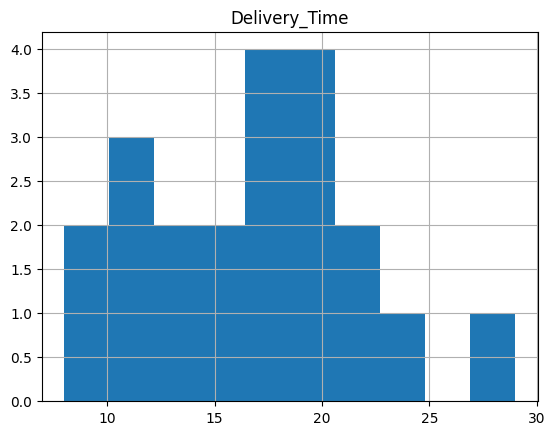

In [150]:
# histogram of 'Delivery_Time'
q1_data['Delivery_Time'].hist()
plt.title('Delivery_Time')

Text(0.5, 1.0, 'Sorting_Time')

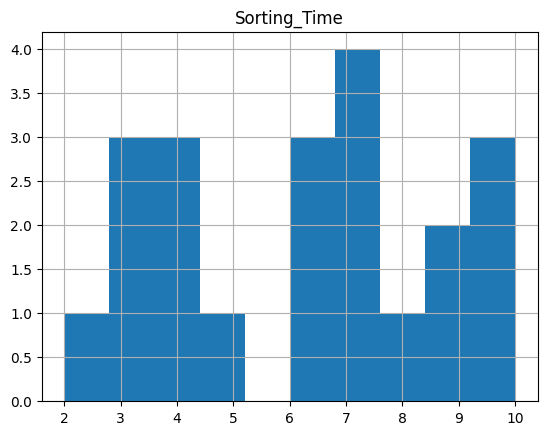

In [151]:
# histogram of 'Delivery_Time'
q1_data['Sorting_Time'].hist()
plt.title('Sorting_Time')

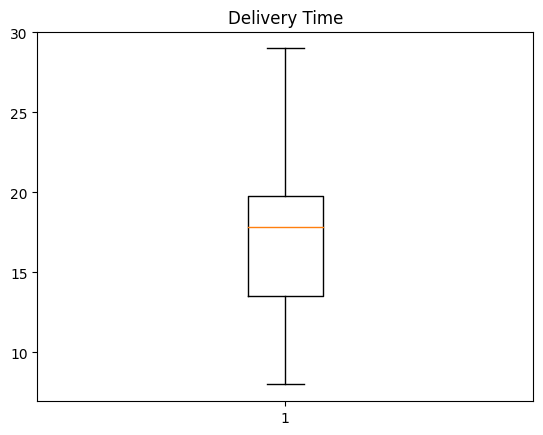

In [152]:
# Based on the chart, we can see that there are no outliers for 'Delivery_Time'
Box_Plot_DT = plt.boxplot(q1_data['Delivery_Time'])
plt.title('Delivery Time')
plt.show()

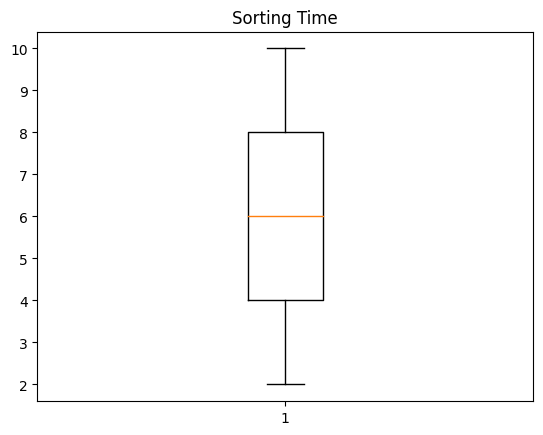

In [153]:
# Based on the chart, we can see that there are no outliers for 'Sorting_Time'
Box_Plot_ST = plt.boxplot(q1_data['Sorting_Time'])
plt.title('Sorting Time')
plt.show()

In [154]:
Box_Plot_DT
# The 'fliers' parameter has details about the outliers, here the 2 arrays are empty confirming no outliers in x as well as y axis
[item.get_data() for item in Box_Plot_DT['fliers']]

[(array([], dtype=float64), array([], dtype=float64))]

In [155]:
Box_Plot_ST
# The 'fliers' parameter has details about the outliers, here the 2 arrays are empty confirming no outliers in x as well as y axis
[item.get_data() for item in Box_Plot_ST['fliers']]

[(array([], dtype=float64), array([], dtype=int64))]

In [156]:
# Descriptive stats
q1_data['Delivery_Time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery_Time, dtype: float64

In [157]:
# Descriptive stats
q1_data['Sorting_Time'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting_Time, dtype: float64

In [158]:
# Bar plot - to identify outliers in categorical data - get count of unique values
q1_data['Delivery_Time'].value_counts()

Delivery_Time
21.00    1
10.75    1
17.83    1
8.00     1
18.11    1
13.75    1
14.88    1
12.03    1
11.50    1
16.68    1
19.83    1
13.50    1
18.75    1
17.90    1
9.50     1
19.00    1
15.35    1
29.00    1
24.00    1
19.75    1
21.50    1
Name: count, dtype: int64

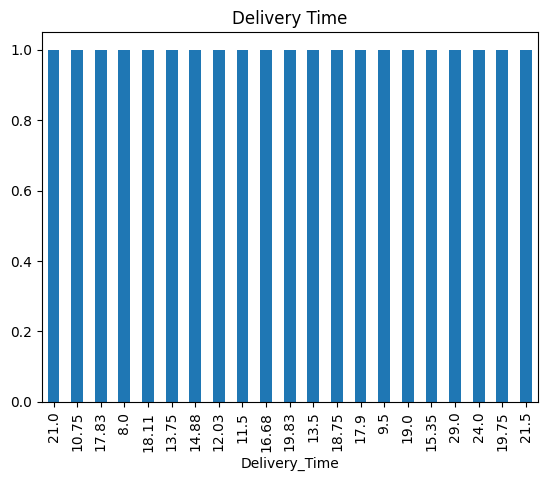

In [159]:
#Bar plot - to identify outliers in categorical data
q1_data['Delivery_Time'].value_counts().plot.bar()
plt.title('Delivery Time')
plt.show()

In [160]:
#Bar plot - to identify outliers in categorical data - get count of unique values
q1_data['Sorting_Time'].value_counts()

Sorting_Time
7     4
10    3
4     3
6     3
3     3
9     2
8     1
2     1
5     1
Name: count, dtype: int64

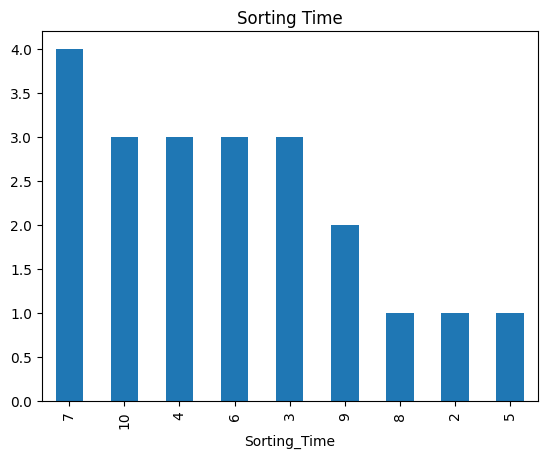

In [161]:
#Bar plot - to identify outliers in categorical data
q1_data['Sorting_Time'].value_counts().plot.bar()
plt.title('Sorting Time')
plt.show()

#### Scatter Plot and Correlation Analysis

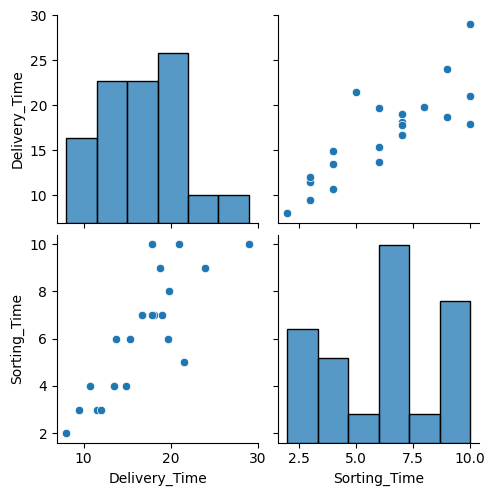

In [162]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
#pd.plotting.scatter_matrix(q1_data)
sns.pairplot(q1_data) # diagonal - histogram, other - scatter plot

In [163]:
q1_data.corr()
# The table shows that there is a "good" correlation between both these columns i.e. 0.825997 or 83% (approx.)

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

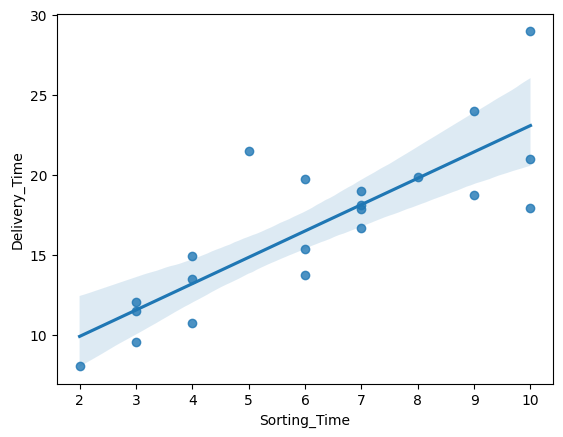

In [164]:
# Visualizing the correlation between x and y i.e., 'Sorting_Time' and 'Delivery_Time'
sns.regplot(x="Sorting_Time",y="Delivery_Time", data = q1_data)
# The visualization also shows that there is a "good" correlation between both these columns similar to the matrix shown earlier.

<Axes: xlabel='Sorting_Time', ylabel='Density'>

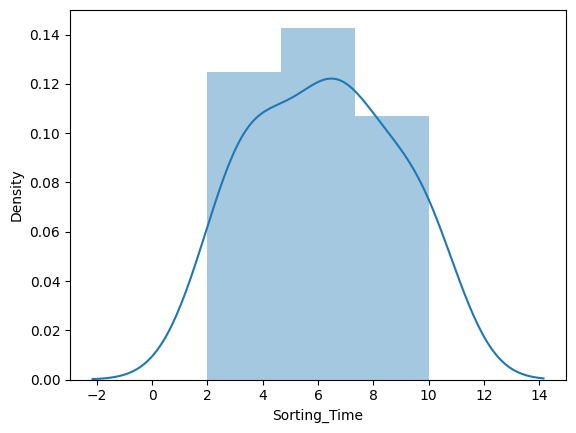

In [165]:
import seaborn as sns
sns.distplot(q1_data['Sorting_Time'])

<Axes: xlabel='Delivery_Time', ylabel='Density'>

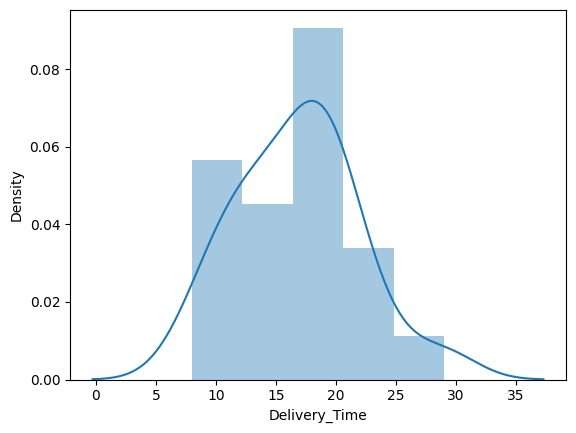

In [166]:
import seaborn as sns
sns.distplot(q1_data['Delivery_Time'])

##### Fitting a Linear Regression Model

In [167]:
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"

orig_model = smf.ols("Delivery_Time~Sorting_Time", data=q1_data).fit()

# Ordinary Least Squares, y Dependent Variable = "Delivery_Time", then give ~ symbol and then x Independent variable - "Sorting_Time" 
# Dataset - q1_data, fit() - the fit function for the regression line

In [168]:
orig_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           3.98e-06
Time:                        16:27:53   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
# Coefficient are B0 (as Intercept in params) and B1 (as Sorting_Time in params)


orig_model.params


# Reg. Equ: Delivery_Time = B0 + B1 * Sorting_Time
# In output: Intercept - B0, Sorting_Time - Coefficient of Sorting_Time i.e. B1
# Delivery_Time = 6.582734 + 1.649020 * Sorting_Time

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [170]:
# R squared values
(orig_model.rsquared, orig_model.rsquared_adj)
# Since rsquared value is 68.2% it is an OK equation with - 0.65 < r**2 < 0.75

(0.6822714748417231, 0.6655489208860244)

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

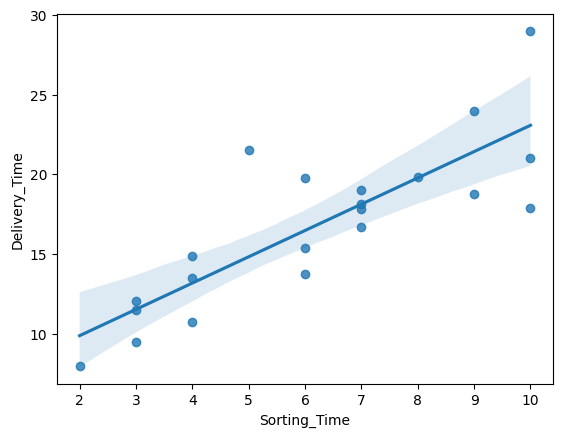

In [171]:
sns.regplot(x="Sorting_Time",y="Delivery_Time", data = q1_data)

In [172]:
# t and p-values
print(orig_model.tvalues,'\n', orig_model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [173]:
q1_data[0:5]

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [174]:
# Creating Prediction_Model column
q1_data['Predicted_Orig_Model'] = orig_model.fittedvalues
q1_data[0:5]

,Delivery_Time,Sorting_Time,Predicted_Orig_Model
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933


In [175]:
orig_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [176]:
#Alternate method to add predicted column
q1_data['Predicted_Manual'] = 6.582734 + 1.649020 * q1_data['Sorting_Time'] # Running for one command automatically creates the entire column
q1_data[0:5]

,Delivery_Time,Sorting_Time,Predicted_Orig_Model,Predicted_Manual
0,21.00,10,23.072933,23.072934
1,13.50,4,13.178814,13.178814
2,19.75,6,16.476853,16.476854
3,24.00,9,21.423913,21.423914
4,29.00,10,23.072933,23.072934


In [177]:
q1_data['Error_Manual'] = q1_data['Delivery_Time'] - q1_data['Predicted_Orig_Model']
q1_data[0:5]


,Delivery_Time,Sorting_Time,Predicted_Orig_Model,Predicted_Manual,Error_Manual
0,21.00,10,23.072933,23.072934,-2.072933
1,13.50,4,13.178814,13.178814,0.321186
2,19.75,6,16.476853,16.476854,3.273147
3,24.00,9,21.423913,21.423914,2.576087
4,29.00,10,23.072933,23.072934,5.927067


In [178]:
# Getting the squared error to remove the sign and only retain the magnitute
q1_data['Error_Sq_Manual'] = np.power(q1_data['Error_Manual'],2)
q1_data[0:5]

,Delivery_Time,Sorting_Time,Predicted_Orig_Model,Predicted_Manual,Error_Manual,Error_Sq_Manual
0,21.00,10,23.072933,23.072934,-2.072933,4.297051
1,13.50,4,13.178814,13.178814,0.321186,0.103161
2,19.75,6,16.476853,16.476854,3.273147,10.713489
3,24.00,9,21.423913,21.423914,2.576087,6.636224
4,29.00,10,23.072933,23.072934,5.927067,35.130124


In [179]:
# Y = B0 + B1 * X + e
# c = 6.582734     # Get this from model.params
# m = 1.649020      # Get this from model.params

q1_data['Y'] = 6.582734 + (1.649020 * q1_data['Sorting_Time']) + q1_data['Error_Manual']
q1_data[0:5]

,Delivery_Time,Sorting_Time,Predicted_Orig_Model,Predicted_Manual,Error_Manual,Error_Sq_Manual,Y
0,21.00,10,23.072933,23.072934,-2.072933,4.297051,21.000001
1,13.50,4,13.178814,13.178814,0.321186,0.103161,13.500000
2,19.75,6,16.476853,16.476854,3.273147,10.713489,19.750001
3,24.00,9,21.423913,21.423914,2.576087,6.636224,24.000001
4,29.00,10,23.072933,23.072934,5.927067,35.130124,29.000001


In [180]:
Mean_Squared_Error = q1_data['Error_Sq_Manual'].mean()
Mean_Squared_Error # 7.793311548584062

# When we are creating multiple models, the one that gives you the least value for 'Mean_Squared_Error' is the best model 

7.793311548584062

In [181]:
# Root Mean Square Error
np.sqrt(Mean_Squared_Error)


2.7916503270617654

In [182]:
orig_model.mse_resid

8.613660132645542

In [183]:
orig_model.rsquared
# 68.22% of variation in the dependent variable is explained by the given independent variable.

0.6822714748417231

In [184]:
# Null Hypothesis - The Sorting_Time doesn't affect the Delivery_Time significantly.
# Alternate Hypothesis - The Sorting_Time affects the Delivery_Time significantly.

# Since p-value is less than 0.05 for 'Sorting_Time' variable, 
# We can say that it is significant variable in predicting the dependent variable 'Delivery_Time'
# p-value will be useful when there are multiple independent values
# Now there is only one independent value i.e. 'Delivery_Time' circulation and therefore there is only 1 pvalue which is less than 0
# If there were mutiple independent variables, we will rule out the ones that give a higher pvalue.

orig_model.pvalues    # Intercept - 0.001147; Sorting_Time: 0.000004

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64

#### Feature Engineering - Check for different transformations of Data to estimate normal distribution and to remove any skewness
##### Transformation of Variables
1. Log Transformation
2. Square Transformation
3. Square Root Transformation
4. Cube Transformation
5. Cube Root Transformation
##### Visualization of Errors


1. Log Transformation

Log transformation of Data

In [185]:
# Log transformation of Data
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"
model_log = smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data=q1_data).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 21 Sep 2023   Prob (F-statistic):           1.60e-07
Time:                           16:27:53   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
# Log Transformation gives 77.2%
model_log.rsquared,model_log.rsquared_adj # 77.2%

(0.77216134926874, 0.7601698413355158)

2. Square Transformation

In [187]:
# Square transformation of Data
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"
model_square = smf.ols('np.power(Delivery_Time,2)~np.power(Sorting_Time,2)', data=q1_data).fit()
model_square.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.power(Delivery_Time, 2)   R-squared:                       0.588
Model:                                    OLS   Adj. R-squared:                  0.567
Method:                         Least Squares   F-statistic:                     27.14
Date:                        Thu, 21 Sep 2023   Prob (F-statistic):           4.99e-05
Time:                                16:27:54   Log-Likelihood:                -129.24
No. Observations:                          21   AIC:                             262.5
Df Residuals:                              19   BIC:                             264.6
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   114.1548     45.231      2.524      0.021      19.485     208.825
np.power(Sorting_Time, 2)     4.3239      0.830      5.209      0.000       2.587       6.061
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.524
Skew:                           0.865   Prob(JB):                        0.172
Kurtosis:                       4.018   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
# Square Transformation gives 58.81%
model_square.rsquared,model_square.rsquared_adj # 58.81%

(0.5881883446986836, 0.566514047051246)

3. Square Root Transformation

In [189]:
# Square Root transformation of Data
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"
model_square_root = smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data=q1_data).fit()
model_square_root.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Thu, 21 Sep 2023   Prob (F-statistic):           8.48e-07
Time:                            16:27:54   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
# Square Root Transformation gives 72.92%
model_square_root.rsquared,model_square_root.rsquared_adj # 72.92%

(0.7292011987544665, 0.7149486302678596)

4. Cube Transformation

In [191]:
# Cube transformation of Data
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"
model_cube = smf.ols('np.power(Delivery_Time,3)~np.power(Sorting_Time,3)', data=q1_data).fit()
model_cube.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     np.power(Delivery_Time, 3)   R-squared:                       0.507
Model:                                    OLS   Adj. R-squared:                  0.481
Method:                         Least Squares   F-statistic:                     19.53
Date:                        Thu, 21 Sep 2023   Prob (F-statistic):           0.000295
Time:                                16:27:54   Log-Likelihood:                -202.45
No. Observations:                          21   AIC:                             408.9
Df Residuals:                              19   BIC:                             411.0
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  2047.9556   1237.652      1.655      0.114    -542.479    4638.391
np.power(Sorting_Time, 3)    11.2475      2.545      4.419      0.000       5.920      16.575
==============================================================================
Omnibus:                       10.080   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.219
Skew:                           1.064   Prob(JB):                       0.0164
Kurtosis:                       5.205   Cond. No.                         705.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
# Cube Transformation gives 50.68%
model_cube.rsquared,model_cube.rsquared_adj # 50.68%

(0.5068655571502552, 0.4809111127897423)

4. Cube Root Transformation

In [193]:
# Cube Root transformation of Data
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"
model_cube_root = smf.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data=q1_data).fit()
model_cube_root.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Thu, 21 Sep 2023   Prob (F-statistic):           4.90e-07
Time:                            16:27:54   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
# Cube Transformation gives 74.41%
model_cube_root.rsquared,model_cube_root.rsquared_adj # 74.41%

(0.7441167577566272, 0.7306492186911866)

Calculation of Root Mean Square for all transformations

In [195]:
q1_data[1:5]

,Delivery_Time,Sorting_Time,Predicted_Orig_Model,Predicted_Manual,Error_Manual,Error_Sq_Manual,Y
1,13.50,4,13.178814,13.178814,0.321186,0.103161,13.500000
2,19.75,6,16.476853,16.476854,3.273147,10.713489,19.750001
3,24.00,9,21.423913,21.423914,2.576087,6.636224,24.000001
4,29.00,10,23.072933,23.072934,5.927067,35.130124,29.000001


In [196]:
from sklearn.metrics import mean_squared_error

# For original calculation of rmse
orig_model_pred_y = orig_model.predict(q1_data['Sorting_Time'])
orig_model_rmse =np.sqrt(mean_squared_error(q1_data['Delivery_Time'], orig_model_pred_y))


# For Log transformation calculation of rmse
model_log_pred_y =np.exp(model_log.predict(q1_data['Sorting_Time']))
model_log_rmse =np.sqrt(mean_squared_error(q1_data['Delivery_Time'], model_log_pred_y))

# For square transformation calculation of rmse
model_square_pred_y =np.sqrt(model_square.predict(q1_data['Sorting_Time']))
model_square_rmse =np.sqrt(mean_squared_error(q1_data['Delivery_Time'], model_square_pred_y))

# For square root transformation calculation of rmse
model_square_root_pred_y =np.power((model_square_root.predict(q1_data['Sorting_Time'])),2)
model_square_root_rmse =np.sqrt(mean_squared_error(q1_data['Delivery_Time'], model_square_root_pred_y))

# For cube transformation calculation of rmse
model_cube_pred_y =np.cbrt(model_cube.predict(q1_data['Sorting_Time']))
model_cube_rmse =np.sqrt(mean_squared_error(q1_data['Delivery_Time'], model_cube_pred_y))

# For cube root transformation calculation of rmse
model_cube_root_pred_y =np.power((model_cube_root.predict(q1_data['Sorting_Time'])),3)
model_cube_root_rmse =np.sqrt(mean_squared_error(q1_data['Delivery_Time'], model_cube_root_pred_y))
orig_model.mse_resid


8.613660132645542

Summary of All Transformations

In [197]:
# Summary of all Transformations
print("\nR Squared\n")
print("The original model rquared is",round(orig_model.rsquared*100,2),"%") # 68.23%
print("The rquared for log transformation is",round(model_log.rsquared*100,2),"%") # 77.22%
print("The rquared for square transformation is",round(model_square.rsquared*100,2),"%") # 58.82%
print("The rquared for square root transformation is",round(model_square_root.rsquared*100,2),"%") # 72.92%
print("The rquared for cube transformation is",round(model_cube.rsquared*100,2),"%") # 50.69%
print("The rquared for cube root transformation is",round(model_cube_root.rsquared*100,2),"%") # 74.41%
print("\nRoot Mean Square Error\n")
print("The original model rmse is",round(orig_model_rmse,2)) # 2.79
print("The rmse for log transformation is",round(model_log_rmse,2)) # 2.75
print("The rmse for square transformation is",round(model_square_rmse,2)) # 2.91
print("The rmse for square root transformation is",round(model_square_root_rmse,2)) # 2.76
print("The rmse for cube transformation is",round(model_cube_rmse,2)) # 3.09
print("The rmse for cube root transformation is",round(model_cube_root_rmse,2)) # 2.76

# The highest R-Squared Score was observed for the transformation using log i.e. 77.22%
# This Model i.e., model_log has the highest score for R-squared and Adjusted R-squared scores than all the other models
# The lowest rmse was observed for the transformation using log i.e. 2.75
# Since the log transformation has the highest R-Squared Score and lowest rmse, we should go with model_log to predict our values.
# But still both the Adjusted R-squared and the R-squared scores are below 85% to be considered as a good model for prediction.
# It is close to 0.8 or 80% and it is a single feature/predictor variable or single independent variable and is expected to be low.
# We can therefore go for this model.


R Squared

The original model rquared is 68.23 %
The rquared for log transformation is 77.22 %
The rquared for square transformation is 58.82 %
The rquared for square root transformation is 72.92 %
The rquared for cube transformation is 50.69 %
The rquared for cube root transformation is 74.41 %

Root Mean Square Error

The original model rmse is 2.79
The rmse for log transformation is 2.75
The rmse for square transformation is 2.91
The rmse for square root transformation is 2.76
The rmse for cube transformation is 3.09
The rmse for cube root transformation is 2.76


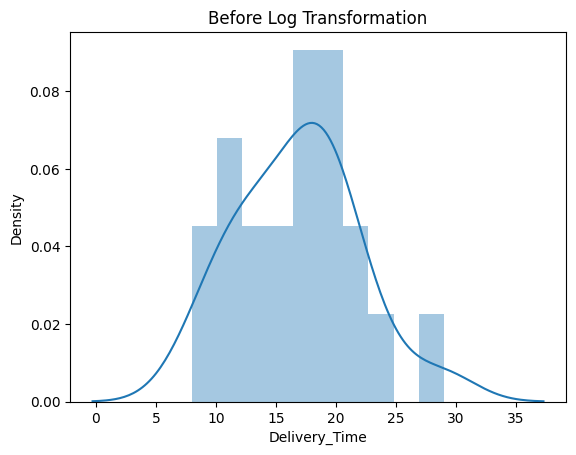

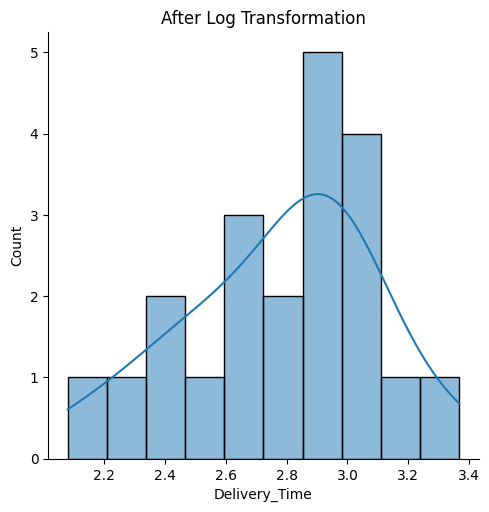

In [198]:
sns.distplot(q1_data['Delivery_Time'], bins = 10, kde = True)
plt.title('Before Log Transformation')
sns.displot(np.log(q1_data['Delivery_Time']), bins = 10, kde = True)
plt.title('After Log Transformation')
plt.show()

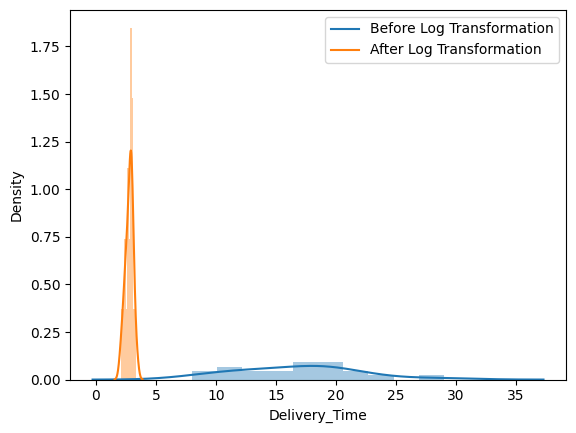

In [199]:
labels = ['Before Log Transformation','After Log Transformation']
sns.distplot(q1_data['Delivery_Time'], bins = 10, kde = True)
sns.distplot(np.log(q1_data['Delivery_Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()


In [200]:
# Prediction using the Best Model i.e., Log Model
q1_data['Predicted_Best_Model_Log'] = pd.DataFrame(np.exp(model_log.predict(q1_data['Sorting_Time'])))
q1_data[0:5]


,Delivery_Time,Sorting_Time,Predicted_Orig_Model,Predicted_Manual,Error_Manual,Error_Sq_Manual,Y,Predicted_Best_Model_Log
0,21.00,10,23.072933,23.072934,-2.072933,4.297051,21.000001,22.597360
1,13.50,4,13.178814,13.178814,0.321186,0.103161,13.500000,13.070123
2,19.75,6,16.476853,16.476854,3.273147,10.713489,19.750001,16.653216
3,24.00,9,21.423913,21.423914,2.576087,6.636224,24.000001,21.218593
4,29.00,10,23.072933,23.072934,5.927067,35.130124,29.000001,22.597360


##### Predict for New Data Point

In [201]:
# Predict for new data
newdata = pd.Series([1,11,8.5,7.5,3,8,12])

In [202]:
newdata

0     1.0
1    11.0
2     8.5
3     7.5
4     3.0
5     8.0
6    12.0
dtype: float64

In [203]:
data_pred = pd.DataFrame(newdata,columns=['Sorting_Time'])

In [204]:
data_pred

,Sorting_Time
0,1.0
1,11.0
2,8.5
3,7.5
4,3.0
5,8.0
6,12.0


In [205]:
# Prediction using the Original Model
orig_model.predict(data_pred) # model-regression model

0     8.231754
1    24.721953
2    20.599403
3    18.950383
4    11.529794
5    19.774893
6    26.370973
dtype: float64

In [206]:
# Prediction using the best model i.e., model_log that uses log
np.exp(model_log.predict(data_pred))

0     5.708676
1    23.921630
2    20.506141
3    19.028477
4    11.005911
5    19.776608
6    25.198244
dtype: float64

## Question 2 - Salary_hike -> Build a prediction model for Salary_hike

#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

File : Salary_Data.csv

In [207]:
#import the libraries
import pandas as pd 
import numpy as np
from scipy import stats

#### Importing data from file delivery_time.csv

In [208]:
# Reading the data from the file 'Salary_Data.csv'
q2_data = pd.read_csv("Salary_Data.csv")
q2_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### EDA (Exploratory Data Analysis)

In [209]:
q2_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Checking for Null Values

In [210]:
# Checking to see if there are any null values
# We can get this information using q2_data.info() option as well
q2_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [211]:
# Data Structure
print(type(q2_data))
print(q2_data.shape)

<class 'pandas.core.frame.DataFrame'>
(30, 2)


In [212]:
# data types
q2_data.dtypes # check data types of all variables

YearsExperience    float64
Salary             float64
dtype: object

#### Checking for Duplicates

In [213]:
# Checking for Duplicate Values
q2_data.duplicated()  # if any 2 rows has same values

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [214]:
# Count of duplicated rows
q2_data[q2_data.duplicated()].shape

(0, 2)

In [215]:
# Print the duplicated rows. Since we don't have any duplicates it will not show anything
q2_data[q2_data.duplicated()]

,YearsExperience,Salary


#### Rename Columns

In [216]:
# Renaming 'YearsExperience' to 'Experience_In_Years'
q2_data.rename(columns = {'YearsExperience':'Experience_In_Years'}, inplace = True)
q2_data.head()

,Experience_In_Years,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Outlier Detection

Plotting q2_data and checking for outliers

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Salary')

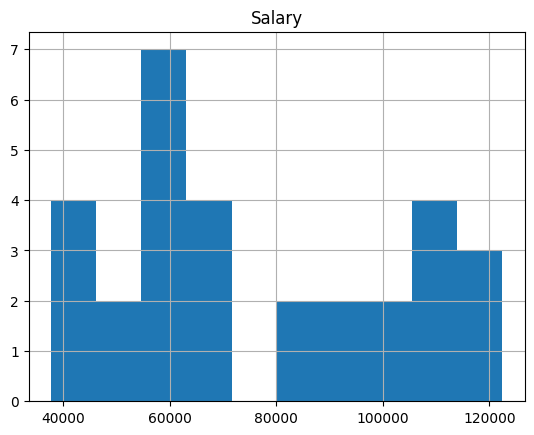

In [218]:
# histogram of 'Delivery_Time'
q2_data['Salary'].hist()
plt.title('Salary')

Text(0.5, 1.0, 'Experience In Years')

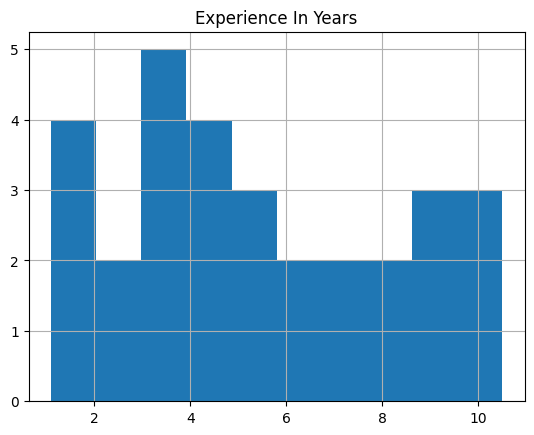

In [219]:
# histogram of 'Experience_In_Years'
q2_data['Experience_In_Years'].hist()
plt.title('Experience In Years')

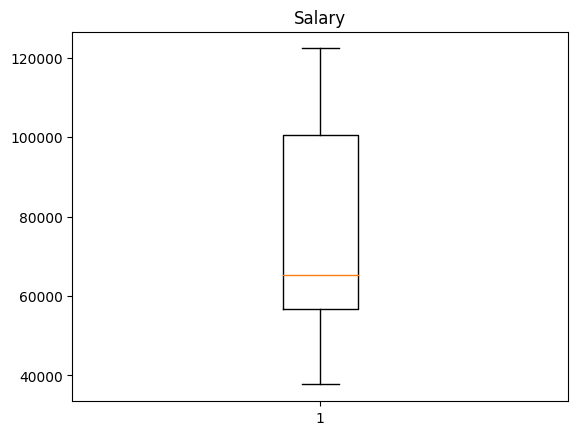

In [220]:
# Based on the chart, we can see that there are no outliers for 'Salary'
Box_Plot_Sal = plt.boxplot(q2_data['Salary'])
plt.title('Salary')
plt.show()

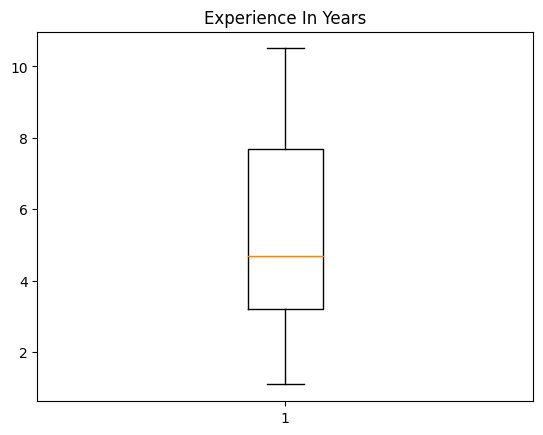

In [221]:
# Based on the chart, we can see that there are no outliers for 'Experience_In_Years'
Box_Plot_Exp = plt.boxplot(q2_data['Experience_In_Years'])
plt.title('Experience In Years')
plt.show()

In [222]:
Box_Plot_Sal
# The 'fliers' parameter has details about the outliers, here the 2 arrays are empty confirming no outliers in x as well as y axis
[item.get_data() for item in Box_Plot_Sal['fliers']]

[(array([], dtype=float64), array([], dtype=float64))]

In [223]:
Box_Plot_Exp
# The 'fliers' parameter has details about the outliers, here the 2 arrays are empty confirming no outliers in x as well as y axis
[item.get_data() for item in Box_Plot_Exp['fliers']]

[(array([], dtype=float64), array([], dtype=float64))]

In [224]:
# Descriptive stats
q2_data['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

In [225]:
# Descriptive stats
q2_data['Experience_In_Years'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: Experience_In_Years, dtype: float64

In [226]:
# Bar plot - to identify outliers in categorical data - get count of unique values
q2_data['Salary'].value_counts()

Salary
39343.0     1
46205.0     1
122391.0    1
112635.0    1
116969.0    1
105582.0    1
109431.0    1
113812.0    1
101302.0    1
98273.0     1
91738.0     1
93940.0     1
81363.0     1
83088.0     1
66029.0     1
67938.0     1
61111.0     1
57081.0     1
56957.0     1
55794.0     1
63218.0     1
57189.0     1
64445.0     1
54445.0     1
60150.0     1
56642.0     1
39891.0     1
43525.0     1
37731.0     1
121872.0    1
Name: count, dtype: int64

<Axes: xlabel='Salary'>

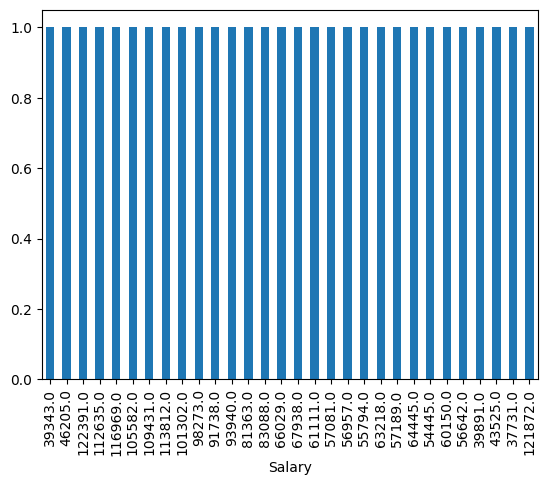

In [227]:
#Bar plot - to identify outliers in categorical data
q2_data['Salary'].value_counts().plot.bar() # Each value for salary is unique

In [228]:
#Bar plot - to identify outliers in categorical data - get count of unique values
q2_data['Experience_In_Years'].value_counts()

Experience_In_Years
3.2     2
4.0     2
1.1     1
5.3     1
10.3    1
9.6     1
9.5     1
9.0     1
8.7     1
8.2     1
7.9     1
7.1     1
6.8     1
6.0     1
5.9     1
5.1     1
1.3     1
4.9     1
4.5     1
4.1     1
3.9     1
3.7     1
3.0     1
2.9     1
2.2     1
2.0     1
1.5     1
10.5    1
Name: count, dtype: int64

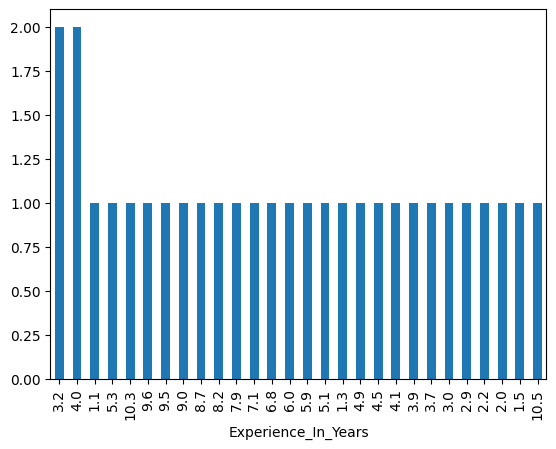

In [229]:
#Bar plot - to identify outliers in categorical data
q2_data['Experience_In_Years'].value_counts().plot.bar() # Except for 2 values all other 'Experience_In_Years' values are unique.
plt.show()

#### Scatter Plot and Correlation Analysis

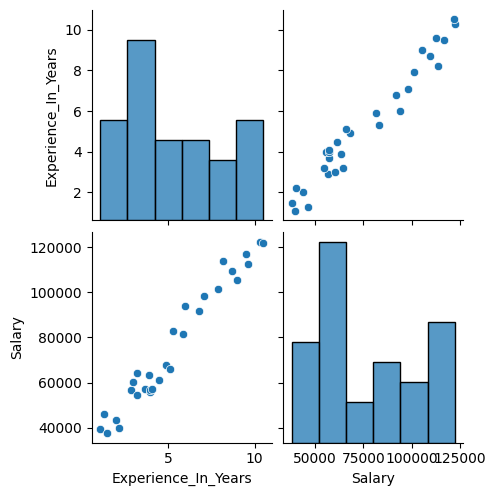

In [230]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(q2_data) # diagonal - histogram, other - scatter plot

In [231]:
q2_data.corr()
# The table shows that there is a "excellent" correlation between both these columns i.e. 0.978242 or 98% (approx.)

,Experience_In_Years,Salary
Experience_In_Years,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Experience_In_Years', ylabel='Salary'>

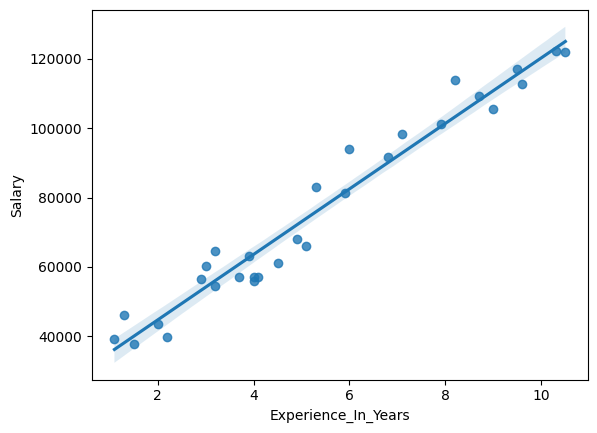

In [232]:
# Visualizing the correlation between x and y i.e., 'Experience_In_Years' and 'Salary'
sns.regplot(x="Experience_In_Years",y="Salary", data = q2_data)
# The visualization also shows that there is a "excellent" correlation between both these columns similar to the matrix shown earlier.


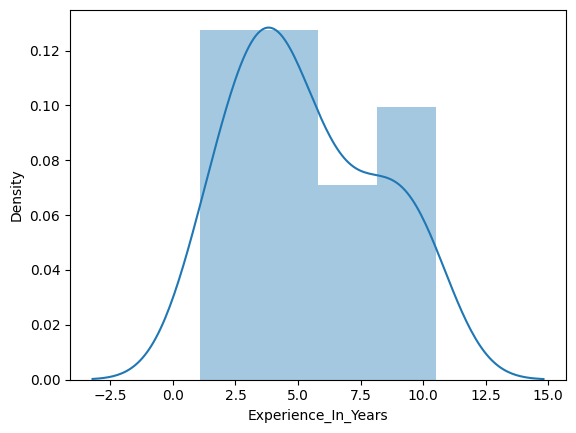

In [233]:
import seaborn as sns
sns.distplot(q2_data['Experience_In_Years'])
plt.show()

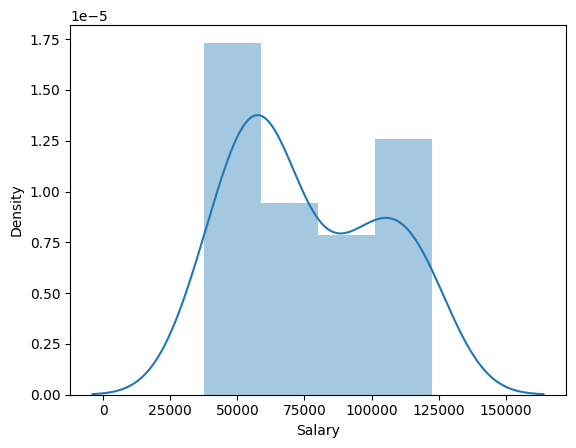

In [234]:
import seaborn as sns
sns.distplot(q2_data['Salary'])
plt.show()

In [235]:
##### Fitting a Linear Regression Model

##### Fitting a Linear Regression Model

In [236]:
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"

orig_model2 = smf.ols("Salary~Experience_In_Years", data=q2_data).fit()

# Ordinary Least Squares, y Dependent Variable = "Salary", then give ~ symbol and then x Independent variable - "Experience_In_Years" 
# Dataset - q2_data, fit() - the fit function for the regression line

In [237]:
orig_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.14e-20
Time:                        16:28:00   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Experience_In_Years  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
# Coefficient are B0 (as Intercept in params) and B1 (as Experience_In_Years in params)


orig_model2.params


# Reg. Equ: Salary = B0 + B1 * Experience_In_Years
# In output: Intercept - B0, Sorting_Time - Coefficient of Experience_In_Years i.e. B1
# Salary = 25792.200199 + 9449.962321 * Experience_In_Years


Intercept              25792.200199
Experience_In_Years     9449.962321
dtype: float64

In [239]:
# R squared values
(orig_model2.rsquared, orig_model2.rsquared_adj)
# Since Determination Coefficient i.e., rsquared value is 95.69% rounding off to 96% it is an Excellent equation with - 0.95 < r**2 < 1.0

(0.9569566641435086, 0.9554194021486339)

<Axes: xlabel='Experience_In_Years', ylabel='Salary'>

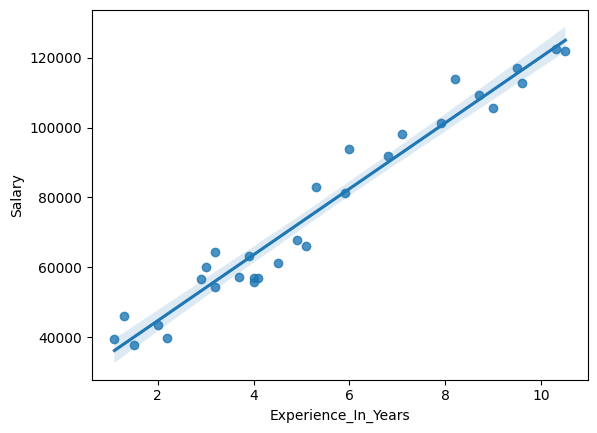

In [240]:
sns.regplot(x="Experience_In_Years",y="Salary", data = q2_data)

In [241]:
# t and p-values
print(orig_model2.tvalues,'\n', orig_model2.pvalues) # p-value - 1.143068e-20 ~ 0

Intercept              11.346940
Experience_In_Years    24.950094
dtype: float64 
 Intercept              5.511950e-12
Experience_In_Years    1.143068e-20
dtype: float64


#### Creating Prediction_Model column

In [242]:
# Creating Prediction_Model column
q2_data['Predicted_Orig_Model'] = orig_model2.fittedvalues
q2_data[0:5]

,Experience_In_Years,Salary,Predicted_Orig_Model
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [243]:
orig_model2.params

Intercept              25792.200199
Experience_In_Years     9449.962321
dtype: float64

In [244]:
#Alternate method to add predicted column
q2_data['Predicted_Orig_Manual'] = 25792.200199 + (9449.962321 * q2_data['Experience_In_Years']) # Running for one command automatically creates the entire column
q2_data[0:5]


,Experience_In_Years,Salary,Predicted_Orig_Model,Predicted_Orig_Manual
0,1.1,39343.0,36187.158752,36187.158752
1,1.3,46205.0,38077.151217,38077.151216
2,1.5,37731.0,39967.143681,39967.143680
3,2.0,43525.0,44692.124842,44692.124841
4,2.2,39891.0,46582.117306,46582.117305


In [245]:
q2_data['Error_Manual'] = q2_data['Salary'] - q2_data['Predicted_Orig_Model']
q2_data[0:5]

,Experience_In_Years,Salary,Predicted_Orig_Model,Predicted_Orig_Manual,Error_Manual
0,1.1,39343.0,36187.158752,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,38077.151216,8127.848783
2,1.5,37731.0,39967.143681,39967.143680,-2236.143681
3,2.0,43525.0,44692.124842,44692.124841,-1167.124842
4,2.2,39891.0,46582.117306,46582.117305,-6691.117306


In [246]:
# Getting the squared error to remove the sign and only retain the magnitute
q2_data['Error_Sq_Manual'] = np.power(q2_data['Error_Manual'],2)
q2_data[0:5]


,Experience_In_Years,Salary,Predicted_Orig_Model,Predicted_Orig_Manual,Error_Manual,Error_Sq_Manual
0,1.1,39343.0,36187.158752,36187.158752,3155.841248,9.959334e+06
1,1.3,46205.0,38077.151217,38077.151216,8127.848783,6.606193e+07
2,1.5,37731.0,39967.143681,39967.143680,-2236.143681,5.000339e+06
3,2.0,43525.0,44692.124842,44692.124841,-1167.124842,1.362180e+06
4,2.2,39891.0,46582.117306,46582.117305,-6691.117306,4.477105e+07


In [247]:
# Y = B0 + B1 * X + e
# c = 25792.200199     # Get this from model.params
# m = 9449.962321    # Get this from model.params

q2_data['Y'] = 25792.200199 + (9449.962321 * q2_data['Experience_In_Years']) + q2_data['Error_Manual']
q2_data[0:5]

,Experience_In_Years,Salary,Predicted_Orig_Model,Predicted_Orig_Manual,Error_Manual,Error_Sq_Manual,Y
0,1.1,39343.0,36187.158752,36187.158752,3155.841248,9.959334e+06,39343.000000
1,1.3,46205.0,38077.151217,38077.151216,8127.848783,6.606193e+07,46205.000000
2,1.5,37731.0,39967.143681,39967.143680,-2236.143681,5.000339e+06,37731.000000
3,2.0,43525.0,44692.124842,44692.124841,-1167.124842,1.362180e+06,43524.999999
4,2.2,39891.0,46582.117306,46582.117305,-6691.117306,4.477105e+07,39890.999999


In [248]:
Mean_Squared_Error = q2_data['Error_Sq_Manual'].mean()
Mean_Squared_Error # 5.966490703963384e-12 ~ 0

# When we are creating multiple models, the one that gives you the least value for 'Mean_Squared_Error' is the best model 

31270951.72228097

In [249]:
orig_model2.rsquared
# 95.69% of variation in the dependent variable is explained by the given independent variable.

0.9569566641435086

In [250]:
orig_model2.pvalues # 1.143068e-20 ~ 0

Intercept              5.511950e-12
Experience_In_Years    1.143068e-20
dtype: float64

In [251]:
# Null Hypothesis - The Experience_In_Years doesn't affect the Salary significantly.
# Alternate Hypothesis - The Experience_In_Years doesn't affect the Salary significantly.

# Since p-value i.e., 0 is less than 0.05 for 'Experience_In_Years' variable, 
# We can say that it is significant variable in predicting the dependent variable 'Salary'
# p-value will be useful when there are multiple independent values
# Now there is only one independent value i.e. 'Experience_In_Years' circulation and therefore there is only 1 pvalue which is less than 0
# If there were mutiple independent variables, we will rule out the ones that give a higher pvalue.

orig_model2.pvalues # Intercept - 5.511950e-12  ~ 0; Experience_In_Years - 1.143068e-201.143068e-20 ~ 0

Intercept              5.511950e-12
Experience_In_Years    1.143068e-20
dtype: float64

#### Feature Engineering - Check for different transformations of Data to estimate normal distribution and to remove any skewness
##### Transformation of Variables
1. Log Transformation
2. Square Transformation
3. Square Root Transformation
4. Cube Transformation
5. Cube Root Transformation
##### Visualization of Errors

1. Log Transformation

In [252]:
# Log transformation of Data
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"
model2_log = smf.ols('np.log(Salary)~np.log(Experience_In_Years)', data=q2_data).fit()
model2_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           7.40e-16
Time:                        16:28:01   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      10.3280      0.056    184.868      0.000      10.214      10.442
np.log(Experience_In_Years)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
# Log Transformation gives 90.52%
model2_log.rsquared,model2_log.rsquared_adj # 90.52%

(0.905215072581715, 0.9018298966024905)

2. Square Transformation

In [254]:
# Square transformation of Data
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"
model2_square = smf.ols('np.power(Salary,2)~np.power(Experience_In_Years,2)', data=q2_data).fit()
model2_square.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.power(Salary, 2)   R-squared:                       0.954
Model:                             OLS   Adj. R-squared:                  0.952
Method:                  Least Squares   F-statistic:                     581.9
Date:                 Thu, 21 Sep 2023   Prob (F-statistic):           2.82e-20
Time:                         16:28:01   Log-Likelihood:                -662.35
No. Observations:                   30   AIC:                             1329.
Df Residuals:                       28   BIC:                             1331.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.866e+09   2.61e+08      7.138      0.000    1.33e+09     2.4e+09
np.power(Experience_In_Years, 2)  1.287e+08   5.34e+06     24.122      0.000    1.18e+08     1.4e+08
==============================================================================
Omnibus:                        6.800   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                5.404
Skew:                           1.014   Prob(JB):                       0.0671
Kurtosis:                       3.454   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [255]:
# Square Transformation gives 95.40%
model2_square.rsquared,model2_square.rsquared_adj # 95.40%

(0.9540880842110778, 0.9524483729329021)

3. Square Root Transformation

In [256]:
# Square Root transformation of Data
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"
model2_square_root = smf.ols('np.sqrt(Salary)~np.sqrt(Experience_In_Years)', data=q2_data).fit()
model2_square_root.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           7.58e-19
Time:                        16:28:01   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(Experience_In_Years)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [257]:
# Square Root Transformation gives 94.19%
model2_square_root.rsquared,model2_square_root.rsquared_adj # 94.19%

(0.9419490138976825, 0.9398757643940283)

4. Cube Transformation

In [258]:
# Cube transformation of Data
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"
model2_cube = smf.ols('np.power(Salary,3)~np.power(Experience_In_Years,3)', data=q2_data).fit()
model2_cube.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.power(Salary, 3)   R-squared:                       0.940
Model:                             OLS   Adj. R-squared:                  0.938
Method:                  Least Squares   F-statistic:                     439.9
Date:                 Thu, 21 Sep 2023   Prob (F-statistic):           1.16e-18
Time:                         16:28:01   Log-Likelihood:                -1019.7
No. Observations:                   30   AIC:                             2043.
Df Residuals:                       28   BIC:                             2046.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.583e+14   3.42e+13      4.637      0.000    8.84e+13    2.28e+14
np.power(Experience_In_Years, 3)  1.607e+12   7.66e+10     20.975      0.000    1.45e+12    1.76e+12
==============================================================================
Omnibus:                       12.365   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               11.596
Skew:                           1.314   Prob(JB):                      0.00303
Kurtosis:                       4.539   Cond. No.                         576.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [259]:
# Cube Transformation gives 94.02%
model2_cube.rsquared,model2_cube.rsquared_adj # 94.02%

(0.9401633889252158, 0.9380263671011163)

4. Cube Root Transformation

In [260]:
# Cube Root transformation of Data
# Fitting a Linear Regression Model
import statsmodels.formula.api as smf    # model_Regression model, "Y~X", or "Dependent_Variable ~ Independent_Variable"
model2_cube_root = smf.ols('np.cbrt(Salary)~np.cbrt(Experience_In_Years)', data=q2_data).fit()
model2_cube_root.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           6.37e-18
Time:                        16:28:01   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(Experience_In_Years)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
# Cube Transformation gives 93.24%
model2_cube_root.rsquared,model2_cube_root.rsquared_adj # 93.24%

(0.9324434036761005, 0.9300306680931041)

#### Calculation of Root Mean Square for all transformations

In [262]:
q2_data[1:5]

,Experience_In_Years,Salary,Predicted_Orig_Model,Predicted_Orig_Manual,Error_Manual,Error_Sq_Manual,Y
1,1.3,46205.0,38077.151217,38077.151216,8127.848783,6.606193e+07,46205.000000
2,1.5,37731.0,39967.143681,39967.143680,-2236.143681,5.000339e+06,37731.000000
3,2.0,43525.0,44692.124842,44692.124841,-1167.124842,1.362180e+06,43524.999999
4,2.2,39891.0,46582.117306,46582.117305,-6691.117306,4.477105e+07,39890.999999


In [263]:
from sklearn.metrics import mean_squared_error

# For original calculation of rmse
orig_model2_pred_y = orig_model2.predict(q2_data['Experience_In_Years'])
orig_model2_rmse =np.sqrt(mean_squared_error(q2_data['Salary'], orig_model2_pred_y))


# For Log transformation calculation of rmse
model2_log_pred_y = np.exp(model2_log.predict(q2_data['Experience_In_Years']))
model2_log_rmse = np.sqrt(mean_squared_error(q2_data['Salary'], model2_log_pred_y))

# For square transformation calculation of rmse
model2_square_pred_y = np.sqrt(model2_square.predict(q2_data['Experience_In_Years']))
model2_square_rmse = np.sqrt(mean_squared_error(q2_data['Salary'], model2_square_pred_y))

# For square root transformation calculation of rmse
model2_square_root_pred_y = np.power((model2_square_root.predict(q2_data['Experience_In_Years'])),2)
model2_square_root_rmse = np.sqrt(mean_squared_error(q2_data['Salary'], model2_square_root_pred_y))

# For cube transformation calculation of rmse
model2_cube_pred_y = np.cbrt(model2_cube.predict(q2_data['Experience_In_Years']))
model2_cube_rmse = np.sqrt(mean_squared_error(q2_data['Salary'], model2_cube_pred_y))

# For cube root transformation calculation of rmse
model2_cube_root_pred_y =np.power((model2_cube_root.predict(q2_data['Experience_In_Years'])),3)
model2_cube_root_rmse =np.sqrt(mean_squared_error(q2_data['Salary'], model2_cube_root_pred_y))

In [264]:
# Summary of all Transformations
print("\nR Squared\n")
print("The original model rsquared is",round(orig_model2.rsquared*100,2)) # 95.7%
print("The rquared for log transformation is",round(model2_log.rsquared*100,2)) # 90.52%
print("The rquared for square transformation is",round(model2_square.rsquared*100,2)) # 95.41%
print("The rquared for square root transformation is",round(model2_square_root.rsquared*100,2)) # 94.19%
print("The rquared for cube transformation is",round(model2_cube.rsquared*100,2)) # 94.02%
print("The rquared for cube root transformation is",round(model2_cube_root.rsquared*100,2)) # 93.24%
print("\nRoot Mean Square Error\n")
print("The original model rmse is",round(orig_model2_rmse,2)) # 5592.04
print("The rmse for log transformation is",round(model2_log_rmse,2)) # 7219.72
print("The rmse for square transformation is",round(model2_square_rmse,2)) # 5986.56
print("The rmse for square root transformation is",round(model2_square_root_rmse,2)) # 5960.65
print("The rmse for cube transformation is",round(model2_cube_rmse,2)) # 8020.28
print("The rmse for cube root transformation is",round(model2_cube_root_rmse,2)) # 6232.82

# The highest transformation is for the original model i.e. 95.7%
# The lowest rmse was observed for the original model with 0.
# The original model gives us ~96% and is considered as an excellent model for prediction.
# If we choose to use another model other than the original one we can choose the square root model which gives us a higher R-squared score 
# We can therefore go for this original model.


R Squared

The original model rsquared is 95.7
The rquared for log transformation is 90.52
The rquared for square transformation is 95.41
The rquared for square root transformation is 94.19
The rquared for cube transformation is 94.02
The rquared for cube root transformation is 93.24

Root Mean Square Error

The original model rmse is 5592.04
The rmse for log transformation is 7219.72
The rmse for square transformation is 5986.56
The rmse for square root transformation is 5960.65
The rmse for cube transformation is 8020.28
The rmse for cube root transformation is 6232.82


In [265]:
q2_data[1:5]

,Experience_In_Years,Salary,Predicted_Orig_Model,Predicted_Orig_Manual,Error_Manual,Error_Sq_Manual,Y
1,1.3,46205.0,38077.151217,38077.151216,8127.848783,6.606193e+07,46205.000000
2,1.5,37731.0,39967.143681,39967.143680,-2236.143681,5.000339e+06,37731.000000
3,2.0,43525.0,44692.124842,44692.124841,-1167.124842,1.362180e+06,43524.999999
4,2.2,39891.0,46582.117306,46582.117305,-6691.117306,4.477105e+07,39890.999999


#### Predict for new data

In [266]:
# Predict for new data
newdata = pd.Series([7,14,21,28])

In [267]:
newdata

0     7
1    14
2    21
3    28
dtype: int64

In [268]:
data_pred = pd.DataFrame(newdata,columns=['Experience_In_Years'])

In [269]:
data_pred

,Experience_In_Years
0,7
1,14
2,21
3,28


In [270]:
# Prediction using the original model, which also happens to be the best model
orig_model2.predict(data_pred) # model-regression model

0     91941.936449
1    158091.672699
2    224241.408949
3    290391.145199
dtype: float64